## Problem Statement

This tutorial takes a practical and coding-focused. We'll define the terms _machine learning_ and _linear regression_ in the context of a problem, and later generalize their definitions. We'll work through a typical machine learning problem step-by-step:


> **QUESTION**: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, **you're tasked with creating an automated system to estimate the annual medical expenditure for new customers**, using information such as their age, sex, BMI, children, smoking habits and region of residence.
>
> Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.
>
> You're given a [CSV file](https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv) containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers.
> <img src="https://i.imgur.com/87Uw0aG.png" width="480">
>
> Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets


**EXERCISE**: Before proceeding further, take a moment to think about how can approach this problem. List five or more ideas that come to your mind below:

 1. ???
 2. ???
 3. ???
 4. ???
 5. ???


## Downloading the Data

In [1]:
from urllib.request import urlretrieve

In [2]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [3]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7b30b0d73fe0>)

In [4]:
import pandas as pd

In [5]:
medical_df = pd.read_csv('medical.csv')

In [6]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Exploratory Analysis and Visualization

In [9]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Age
Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64.

In [11]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [12]:
fig = px.histogram(medical_df, x='age', marginal = 'box', nbins=47, title='Age Distribution of Patients')
fig.update_layout(bargap=0.1)
fig.show()

# Body Mass Index

In [13]:
fig = px.histogram(medical_df, x='bmi', marginal='box', color_discrete_sequence=['purple'], title='Body Mass Index Distribution')
fig.update_layout(bargap=0.1)
fig.show()

# Charges

In [14]:
fig = px.histogram(medical_df, x='charges', marginal='box', color='smoker', color_discrete_sequence=['green', 'grey'], title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

# Sex

In [15]:
fig = px.histogram(medical_df, x='charges', y='sex', color='sex', color_discrete_sequence=['pink', 'blue'], title='Annual Medical Charges by Sex')
fig.show()

In [16]:
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [17]:
px.histogram(medical_df, x = 'smoker', color='sex', title = 'smoker')

# Age & Charges

In [18]:
fig = px.scatter(medical_df, x='age', y='charges', color = 'smoker', opacity=0.8, hover_data=['sex'], title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

# BMI and Charges

In [19]:
fig = px.scatter(medical_df, x='bmi', y='charges', color = 'smoker', opacity=0.8, hover_data=['sex'], title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()
#

In [20]:
px.violin(medical_df, x='children', y='charges')

# Correlation

Computing the correlation coefficient

In [21]:
smoker_numeric = medical_df.smoker.map({'yes': 1, 'no': 0})

In [22]:
medical_df.charges.corr(smoker_numeric) # Correlation of Charges with smoking

np.float64(0.787251430498478)

In [23]:
medical_df.charges.corr(medical_df.age) # Correlation of Charges with age

np.float64(0.2990081933306476)

In [24]:
medical_df.charges.corr(medical_df.bmi) # Correlation of Charges with BMI

np.float64(0.19834096883362895)

In [25]:
medical_df.charges.corr(medical_df.children) # Correlation of Charges with Children

np.float64(0.06799822684790478)

In [26]:
#medical_df.corr()

In [27]:
numeric_medical_df = medical_df.select_dtypes(include=['number'])
correlation_matrix = numeric_medical_df.corr()
display(correlation_matrix)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


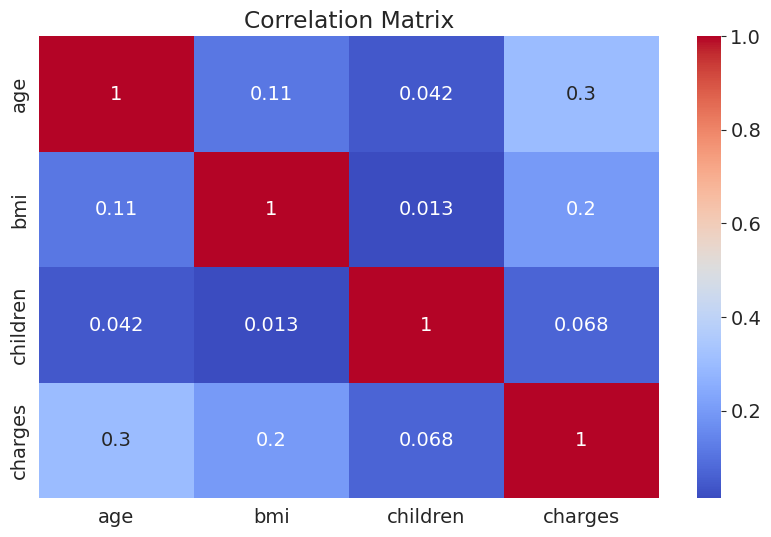

In [28]:
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

#Linear Regression Using a Single Feature

In [29]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

<Axes: xlabel='age', ylabel='charges'>

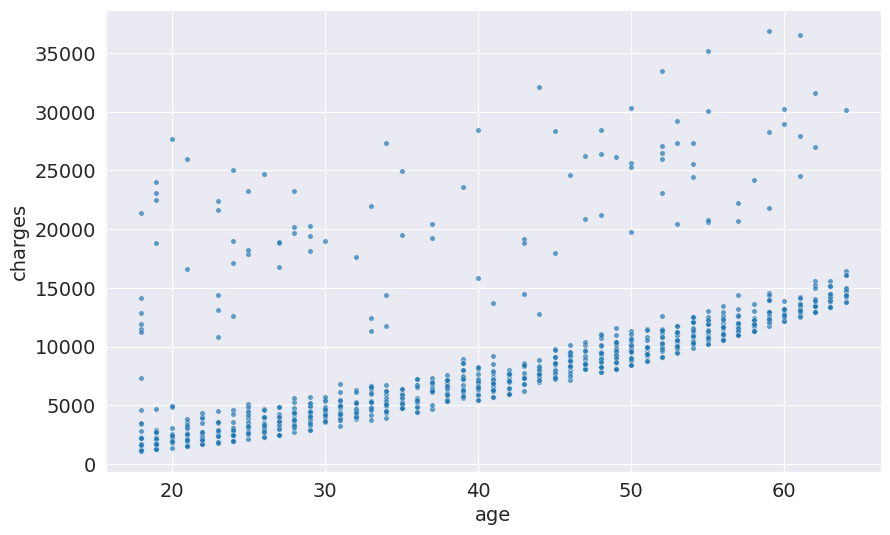

In [30]:
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha = 0.7, s = 15)

Model

### In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assume the following relationship between the two:

## charges=w×age+b
We'll try determine
w
w and
b
b for the line that best fits the data.
This technique is called linear regression, and we call the above equation a linear regression model, because it models the relationship between "age" and "charges" as a straight line.
The numbers
w
w and
b
b are called the parameters or weights of the model.
The values in the "age" column of the dataset are called the inputs to the model and the values in the charges column are called "targets".
Let define a helper function estimate_charges, to compute
charges, given age, w and b.

In [31]:
def estimate_charges(age, w, b):
  return w * age + b

The estimate_charges function is our very first model.

In [32]:
w = 50
b = 100

In [33]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

In [34]:
estimated_charges

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


In [35]:
non_smoker_df.charges

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


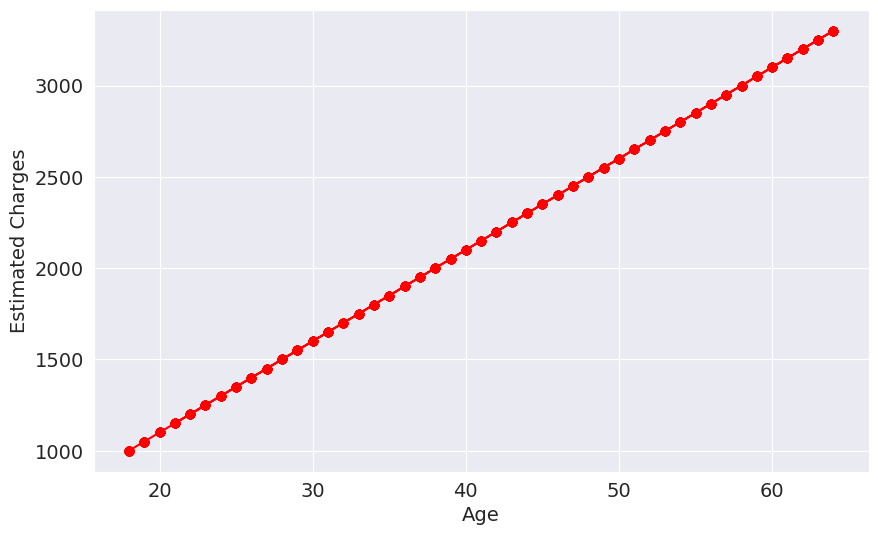

In [36]:
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

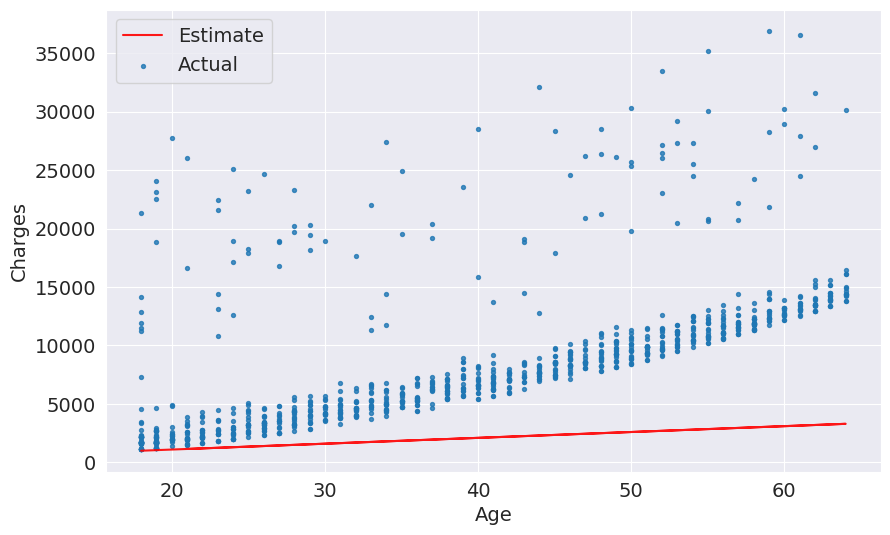

In [37]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [38]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

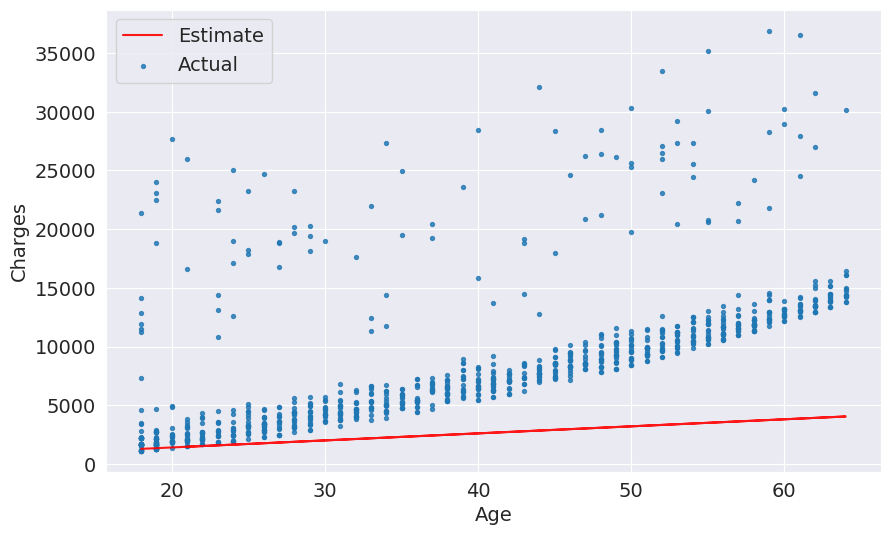

In [39]:
try_parameters(60, 200)

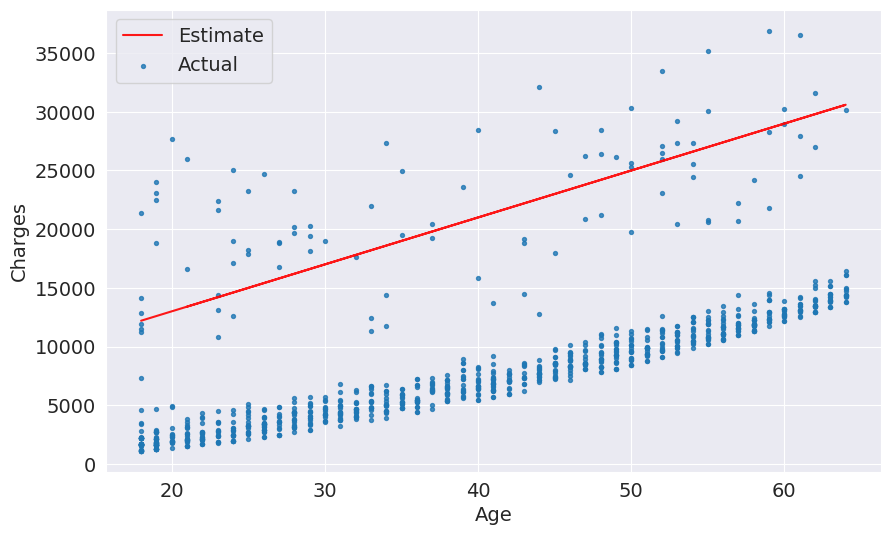

In [40]:
try_parameters(400, 5000)

#Loss/Cost Function

In [41]:
import numpy as np

In [42]:
def rmse(targes, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

In [43]:
w = 50
b = 100

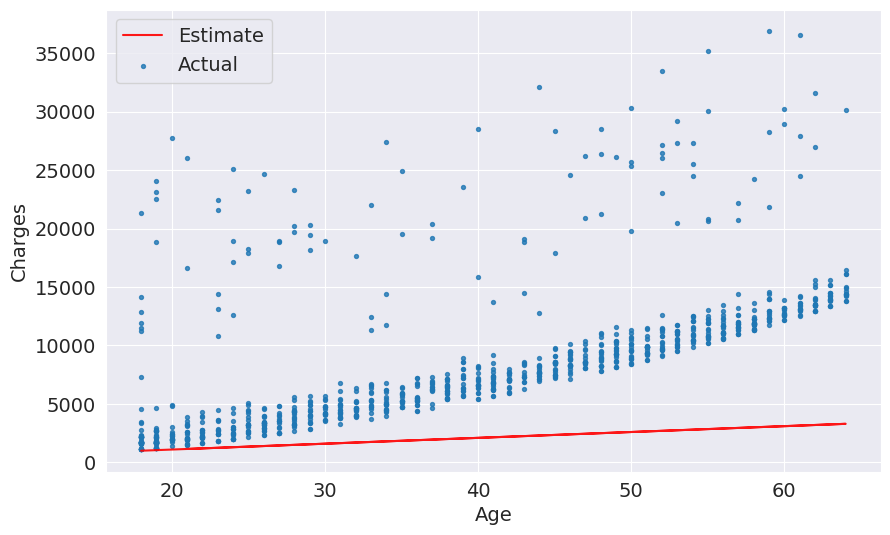

In [44]:
try_parameters(w, b)

In [45]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [46]:
rmse(targets, predicted)

np.float64(8461.949562575493)

In [47]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  8461.949562575493


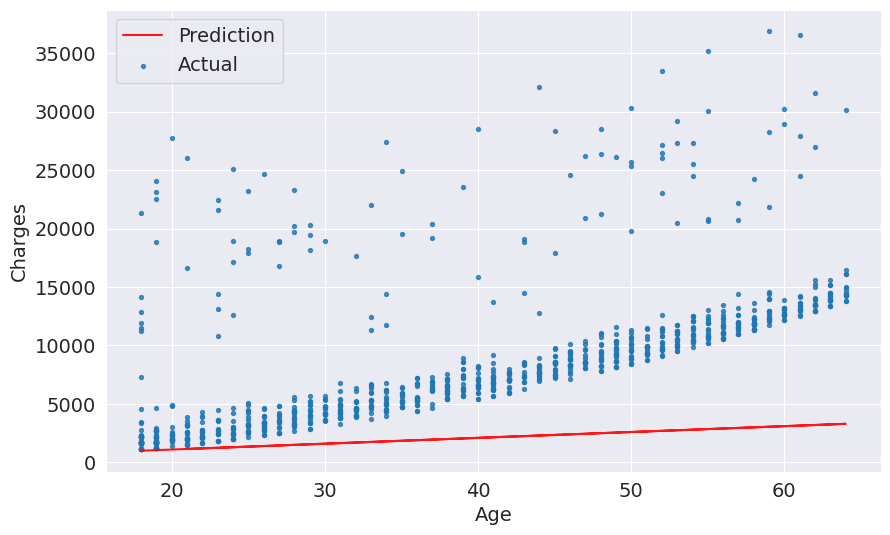

In [48]:
try_parameters(50, 100)

#Linear Regression using Scikit-Learn

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
model = LinearRegression()

In [51]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [52]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df['charges']
print('inputs.shape', inputs.shape)
print('targets.shape', targets.shape)

inputs.shape (1064, 1)
targets.shape (1064,)


In [53]:
model.fit(inputs, targets)

LinearRegression()

In [54]:
predictions = model.predict(inputs)

In [55]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [56]:
targets

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [57]:
rmse(targets, predictions)

np.float64(4662.505766636395)

In [58]:
model.coef_

array([267.24891283])

In [59]:
model.intercept_

np.float64(-2091.4205565650864)

RMSE Loss:  4662.505766636395


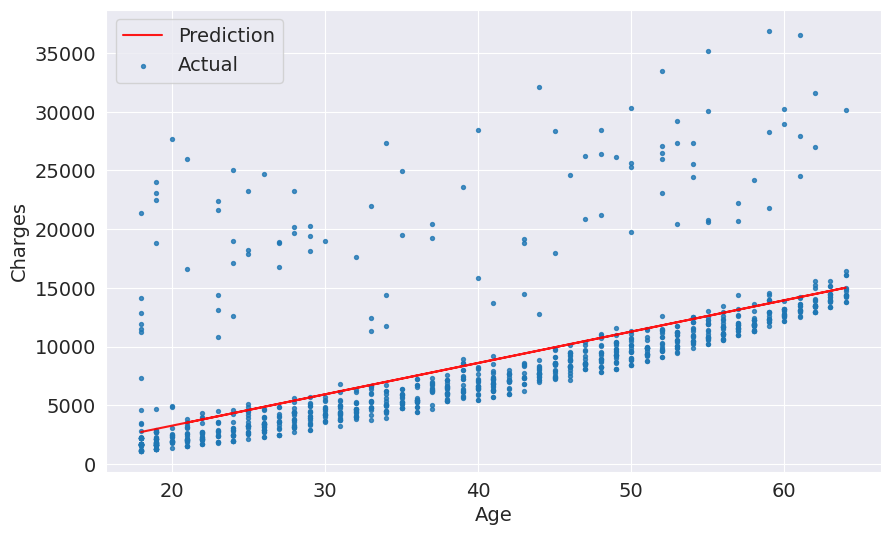

In [60]:
try_parameters(model.coef_, model.intercept_)

In [61]:
from sklearn.linear_model import SGDRegressor

In [62]:
model = SGDRegressor(max_iter=1000)

In [63]:
model.fit(inputs, targets)

SGDRegressor()

In [64]:
predictions = model.predict(inputs)

In [65]:
predictions

array([  73.67888115, 3208.66516591, 4776.15830829, ...,   73.67888115,
         73.67888115, 1014.17476658])

In [66]:
rmse(targets, predictions)

np.float64(4990.611475257698)

RMSE Loss:  4990.611475257698


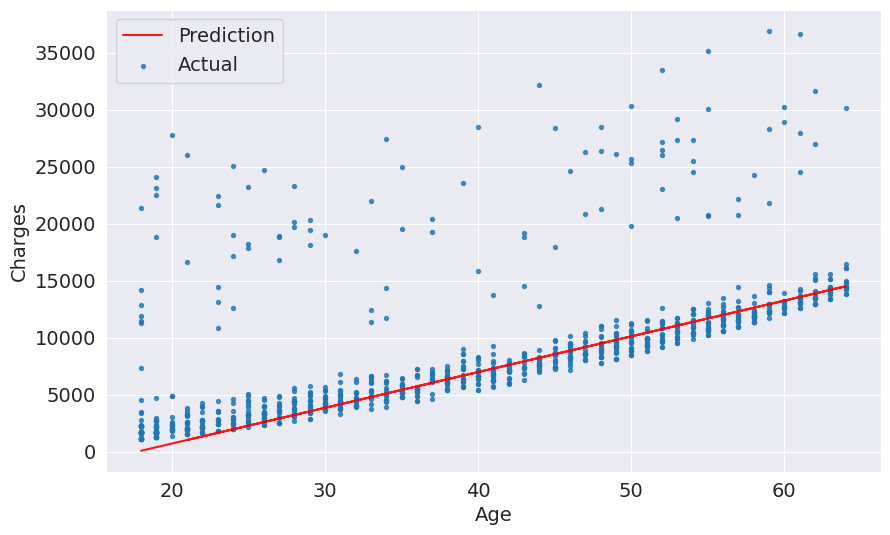

In [67]:
try_parameters(model.coef_, model.intercept_)

# Linear Regression using Multiple Variables

charges = w1 x age + w2 x bmi + b

In [68]:
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df[['charges']]
model = LinearRegression()
model.fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)
#try_parameters(model.coef_, model.intercept_)

Loss: 4662.3128354612945


In [69]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

np.float64(0.0840365431283327)

# Using Categorical Features for ML

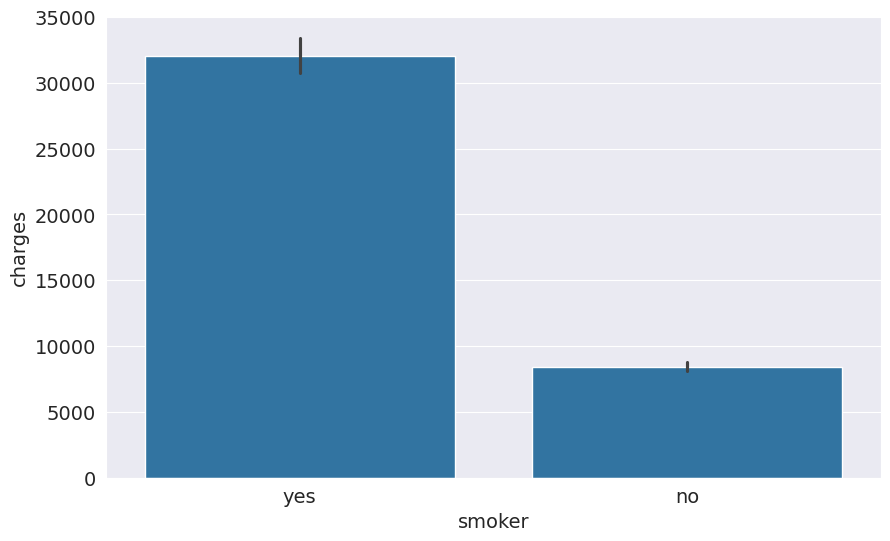

In [70]:
sns.barplot(data=medical_df, x='smoker', y='charges');
#

In [73]:
smoker_codes = medical_df.smoker.map({'yes': 1, 'no': 0})
medical_df['smoker_code'] = smoker_codes

In [74]:
medical_df.charges.corr(smoker_codes)
#

np.float64(0.787251430498478)

In [77]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df[['charges']]

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

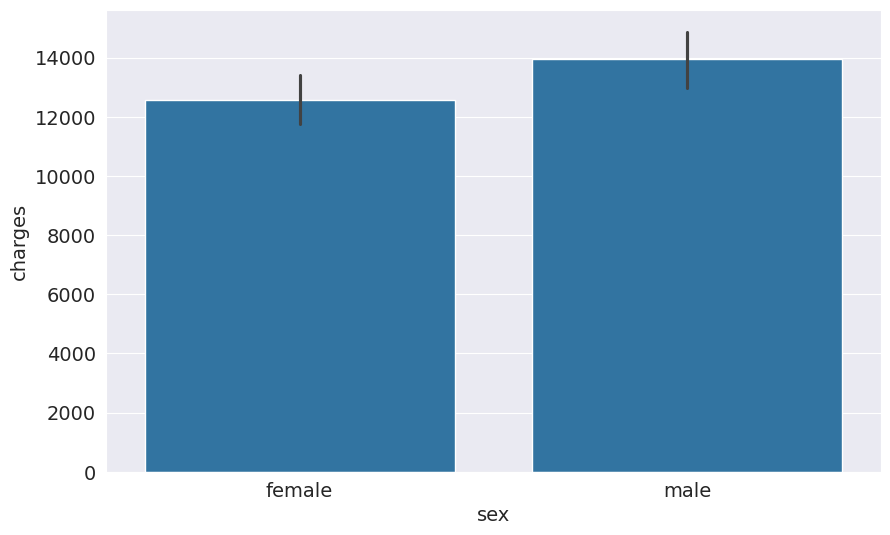

In [80]:
sns.barplot(data=medical_df, x='sex', y='charges')
#

In [81]:
sex_codes = medical_df.sex.map({'female': 1, 'male': 0})
medical_df['sex_code'] = sex_codes

In [84]:
medical_df.charges.corr(medical_df.sex_code)

np.float64(-0.057292062202025484)

In [85]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df[['charges']]

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


# One-Hot Encoding

<Axes: xlabel='region', ylabel='charges'>

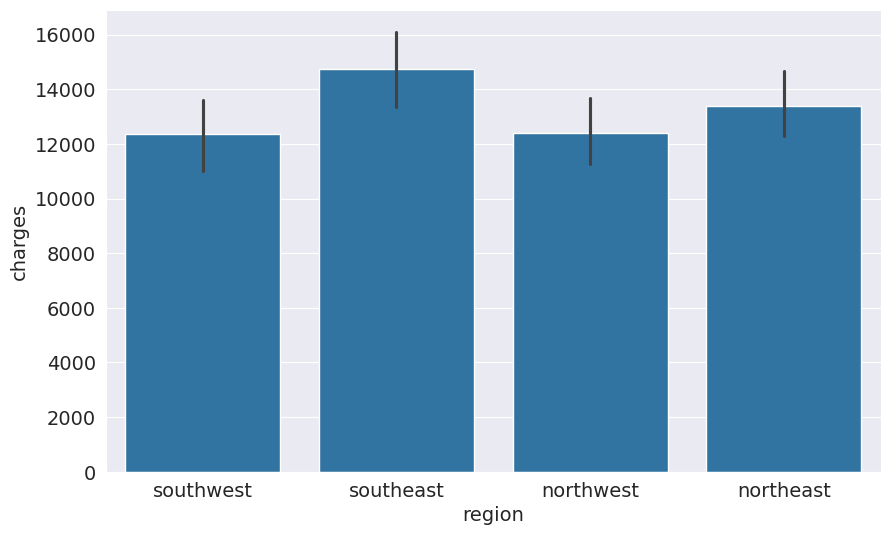

In [86]:
sns.barplot(data=medical_df, x='region', y='charges')

In [88]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [89]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [90]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [91]:
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [92]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']
model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss:', loss)
#

Loss: 6041.6796511744515
